![picture](https://qinnova.uned.es/archivos_publicos/qweb_paginas/10926/logooficialunedpontevedra.png)

# **PYTHON AVANZADO - SEGUNDO DÍA**
**PROFESORES:**

Ana Larrañaga Janeiro - [**email**: alarranagaj@pontevedra.uned.es]

Miguel Martínez Comesaña - [**email**: mmartinezc@pontevedra.uned.es]

TEMA | | 
-------------------|------------------
1 Procesado de lenguaje natural
2 Procesado de imagen
3 Clustering


# **1. PROCESADO DE LENGUAJE NATURAL**
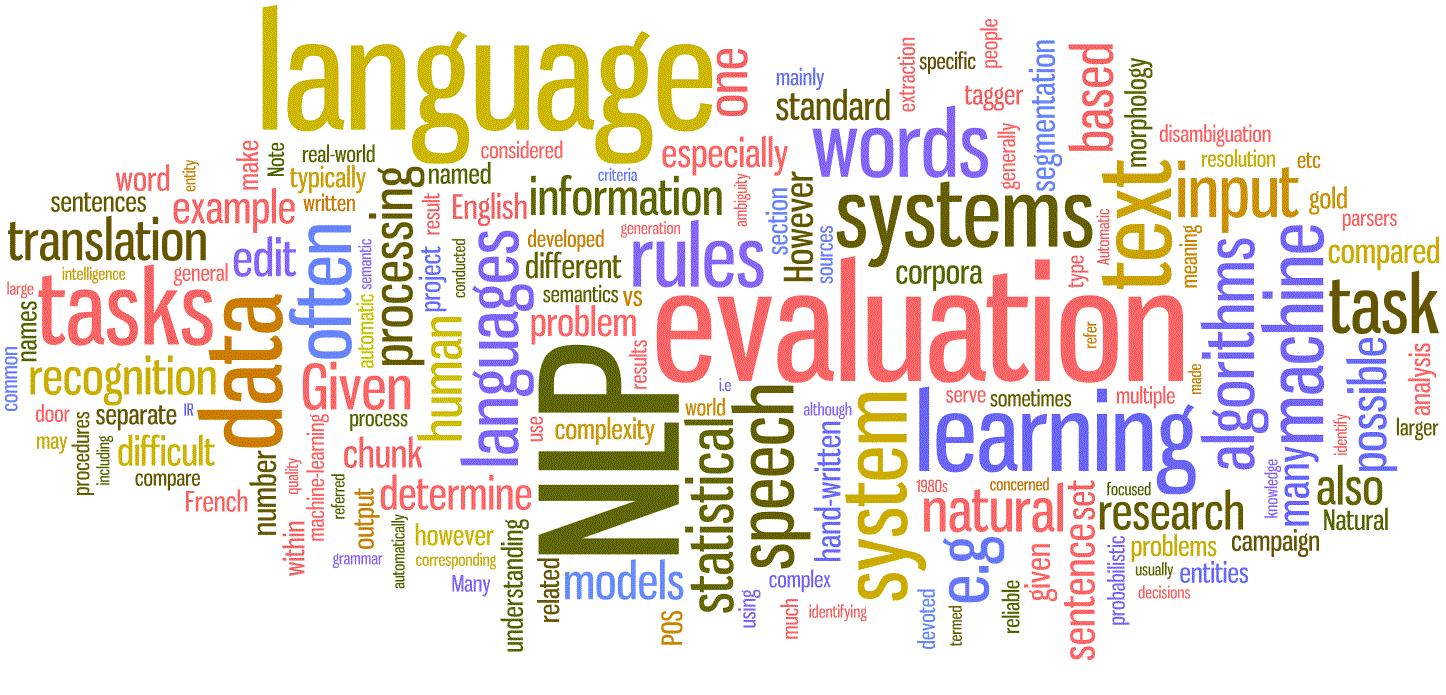


[REFERENCIA IMAGEN](https://towardsdatascience.com/beginners-guide-to-lda-topic-modelling-with-r-e57a5a8e7a25)

### *1.1. DEFINICIÓN E IMPORTANCIA*
---

El procesamiento del lenguaje natural (NLP = Natural Language Processing) es una rama de la inteligencia artificial que ayuda a las computadoras a entender, interpretar y manipular el lenguaje humano. [[ Referencia ]](https://www.sas.com/es_ar/insights/analytics/what-is-natural-language-processing-nlp.html)

¿Qué lo hace importante...?
1. Grandes bases de datos textuales. 
2. Estructurar dichas bases de datos no estructurados.

### *1.2. TAREAS BÁSICAS*
---
Todas ellas se basan en intentar dividir el lenguaje en partes más elementales que ayuden a buscar relaciones y permitan explicar su significado.

- Simbolización y análisis sintáctico
- Lematización/derivación (Diferentes palabras referidas al mismo concepto)
- Subtítulos o etiquetado
- Detección del lenguaje
- Identificación de relaciones semánticas

Estas tareas son el **paso inicial** para el desarrollo de tareas más complejas como puede ser el **análisis de sentimiento** (ejemplo que trataremos en este curso) o la categorización de contenido en aplicaciones o redes sociales, entre otros. 

## *1.3. ¿DÓNDE PODEMOS VER APLICADAS ESTE TIPO DE TECNOLOGÍAS?*

---


- *Asistentes personales*: Siri, Cortana, Google Assistant.
- *Tecnologías de auto-completado de texto*: Motores de búsqueda de Google.
- *Correcciones ortográficas*: desde Microsoft Word hasta Google Docs.
- *Traducción de textos*: DeepL, Google Translate. 


**RULE-BASED NATURAL LANGUAGE PROCESSING**

---

Las técnicas que se basan es la proclamación de reglas para el aprendizaje (como puede ser asociar que haga calor con una temperatura alta, o el hielo con une temperatura fría), aunque pueda funcionar, se trata de un proceso tremendamente costoso. 

**STATISTICAL NATURAL LANGUAGE PROCESSING**

---

Básicamente utiliza algoritmos de machine learning para entrenar modelos de aprendizaje de NLP. Este tipo de prácticas son más escalables, aprenden por si solas y suelen desarrollarse en menor tiempo que el aprendizaje basado en reglas. El mayor problema es que requiere de grandes cantidades de datos y resulta ciertamente complicado encontrar fallos en el mismo.


## *1.4. LIBRERÍAS*

---



[NLTK](https://www.nltk.org/) - Natural Language Toolkit

*NLTK es una plataforma líder para crear programas en Python que trabajen con datos del lenguaje humano. Ofrece interfaces fáciles de usar para más de 50 corpus y recursos léxicos como WordNet, junto con un conjunto de librerías de procesamiento de texto para la clasificación, la tokenización, el stemming, el etiquetado, el análisis sintáctico y el razonamiento semántico, envoltorios para librerías de NLP de uso industrial y un foro de debate activo.*

Usada para sistemas de recomendación, análisis de sentimiento y construcción de chatbots.


---



[spaCy](https://spacy.io/)

SpaCy está diseñado para uso del desarrollo de aplicaciones y procesar grandes volúmenes de texto, con gran número de utilidades. Sirve para pre-procesar texto que después será utilizado en deep learning, contiene modelos pre-entrados, y componentes más sencillos de etiquetado de texto, lematización, segmentación de documentos, clasificación de texto y mucho más.

---

[Gensim](https://radimrehurek.com/gensim/)

Esta librería open source desarrollada en Python por Radim Rehurek se utiliza para tareas de clasificación no supervisada de temáticas en los textos, siendo capaz de extraer el tema sobre el que tratan distintos documentos. 

Ejemplo de aplicación de esta librería: https://www.geeksforgeeks.org/nlp-gensim-tutorial-complete-guide-for-beginners/

---


[TextBlob](https://textblob.readthedocs.io/en/dev/)

TextBlob es otra de las aplicaciones que existen para procesado de texto en Python, bastante sencilla pero vital para desarrolladores que estén comenzando el proceso. 

Sirve para identificar nombres dentro de las palabras dentro de una frase, clasificación, dividir texto en frases y palabras, medir la frecuencia de aparición de palabras en el texto, corrección de ortografía, análisis de sentimiento, etc. 

---


[CoreNLP](https://stanfordnlp.github.io/CoreNLP/)

Esta librería fue desarrollada en Java en la Universidad de Standford. Es algo más específica que las otras que hemos mencionado pero incluyendo la identificación de los límites entre las palabras y frases, tipos de palabras y contrucciones sintácticas, sentimiento y relaciones, entre otros. Actualmente admite ocho idiomas diferentes: alemán, árabe, chino, español, francés, inglés, húngaro e italiano.

---

## *1.5. APLICACIÓN: ANÁLISIS DE SENTIMIENTO - Utilizando NLTK*

---



Para empezar a trabajar con distintas técnicas de procesado de texto, utilizaremos una de las aplicaciones más genéricas: el análisis de sentimiento de un conjunto de tweets.

Referencias:
*   https://www.kaggle.com/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model/notebook
*   https://blog.cambridgespark.com/50-free-machine-learning-datasets-sentiment-analysis-b9388f79c124



Referencias del caso sobre el que trabajaremos: 

https://www.kaggle.com/kazanova/sentiment140

https://www.kaggle.com/stoicstatic/twitter-sentiment-analysis-for-beginners

### 1.5.1.   Comenzamos importando las librerías y paquetes que nos harán falta.


In [1]:
# Importamos librerías básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [2]:
# Importamos librería de procesado de texto que emplearemos 
# Documentación: https://www.nltk.org/api/nltk.sentiment.sentiment_analyzer.html
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import *
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(["stopwords","vader_lexicon","punkt","names","averaged_perceptron_tagger"])
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package wordnet to /home/eloi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/eloi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/eloi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/eloi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to /home/eloi/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/eloi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# Para realizar el entrenamiento del modelo de ML, emplearemos la muy conocida librería sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

### 1.5.2.   Conectamos nuestro google colab con nuestro drive particular para cargar el dataset.

In [4]:
# Conectamos nuestro Google colab con drive para poder cargar los archivos
# from google.colab import drive
# drive.mount('/content/drive')

### 1.5.3.   Comenzamos a trabajar con el dataset de trabajo



In [5]:
data = pd.read_csv('/media/eloi/ELOI/UNED/Cursos de Extension/Python Avanzado/Clases/Dia_2/Data_dia_2/sentiment_dataset.csv', encoding='ISO-8859-1', names=['sentimiento','id','date','flag','user','tweet'])

In [6]:
# Para ahorrarnos espacio, podemos quedarnos simplemente con el texto del tweet y el sentimiento del mismo.
data = data[['sentimiento','tweet']]

data = pd.concat([data[data.sentimiento == 0][0:20000], data[data.sentimiento == 4][0:20000]])

In [7]:
# Partiendo de que trabajamos con un dataset con 1.6M de tweets, comprobamos si los datos están balanceados. 
# Recordamos que el 0 corresponde a un sentimiento NEGATIVO y un 4 a un sentimiento POSITIVO. 
data.groupby('sentimiento').count()

,tweet
sentimiento,
0,20000
4,20000


In [8]:
# Creamos dos listas: la información del tweet y del sentimiemto
tweet, sentimiento = list(data['tweet']), list(data['sentimiento'])

### 1.5.4.   Limpieza del dataset



Dependiendo del dataset, es posible que haya que eliminar caracteres que aparezcan específicamente en el mismo. En este caso, es necesario eliminar tanto emojis como stopwords para lematizar posteriormente las palabras restantes. 

In [9]:
# Creamos un diccionario con los emojis para poder procesarlos con lenguaje natural
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused','<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat',';D':'winkhappy'}

In [10]:
# Veamos el texto antes de limpiarlo...
tweet[:10]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ']

In [11]:
# Ahora jugaremos con uno de ellos, para enteder los pasos de "limpieza"
print(tweet[0])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [12]:
# Eliminar URLs para que sólo aparezcan las letras URL - Nos fijamos en la URL que aparece al comienzo del tweet. ("((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)")
tweet[0] = re.sub(r'((http://)[^ ]*|(https://[^ ]*|(www\.)[^ ]*))', '', tweet[0])

tweet[0]

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [13]:
# Eliminar los emojis - Nos fijamos en el ;D del final del tweet. 
for emoji in emojis.keys():
    tweet[0] = tweet[0].replace(emoji, '')  #Eliminar los emojis 

tweet[0]

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. "

In [14]:
# Eliminar el nombre de usuario del tweet. - Nos fijamos en el nombre de usuario del comienzo del tweet
tweet[0] = re.sub(r'@[^\s]+', '', tweet[0])

tweet[0]

"  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. "

In [15]:
# Eliminar aquellos caracteres que no sean letras o números - Nos fijamos en el guión del comienzo del tweet, o en los puntos intermedios.
tweet[0] = re.sub(r'[^a-zA-Z0-9]', ' ', tweet[0])

tweet[0]

'    Awww  that s a bummer   You shoulda got David Carr of Third Day to do it  '

In [16]:
# Cambiar una palabra que tenga muchas letras seguidas para que sólo tenga dos: 'hoooola' pasaría a 'hoola' - Nos fijamos en el "Awww" inicial
                  # Cambiar una palabra que tenga muchas letras seguidas para que sólo tenga dos: 'hoooola' pasaría a 'hoola'
tweet[0] = re.sub(r'(.)\1\1', r'\1\1', tweet[0])

tweet[0]

'   Aww  that s a bummer  You shoulda got David Carr of Third Day to do it  '

In [17]:
# Ahora trabajaremos con las palabras por separado, para lematizarlas...
# Referencia sobre lematización y radicalización: https://medium.com/qu4nt/reducir-el-n%C3%BAmero-de-palabras-de-un-texto-lematizaci%C3%B3n-y-radicalizaci%C3%B3n-stemming-con-python-965bfd0c69fa
# Referencia sobre lematización: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
ex = 'She was singing so loud with her friends'
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stemmer_english = SnowballStemmer("english")

print('La función split() sirve para dividir una frase en palabras: ' + str(ex.split()))

for palabra in ex.split(): #Recorremos la lista de palabras
    if len(palabra)>1: # Si la longitud de la palabra es mayor a 1 caracter
      print('Antes: ' + str(palabra))
      palabra = lemmatizer.lemmatize(palabra, pos='v')  # Lematizar en verbos
      palabra = stemmer.stem(palabra)
      palabra = stemmer_english.stem(palabra)
      print('Después: ' + str(palabra))


La función split() sirve para dividir una frase en palabras: ['She', 'was', 'singing', 'so', 'loud', 'with', 'her', 'friends']
Antes: She
Después: she
Antes: was
Después: be
Antes: singing
Después: sing
Antes: so
Después: so
Antes: loud
Después: loud
Antes: with
Después: with
Antes: her
Después: her
Antes: friends
Después: friend


In [18]:
# Pues bien, ahora aplicamos todas las técnicas de preprocesado anteriores a todo el dataset: 
tweet_clean = [];

for individual in tweet:
  individual = individual.lower() # Pasar a minúsculas todo el texto
  individual = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)",'URL',individual) # Eliminar URLs para que sólo aparezcan las letras URL

  for emoji in emojis.keys():
      individual = individual.replace(emoji, "") #Eliminar los emojis 

  individual = re.sub('@[^\s]+','', individual) # Eliminar el nombre de usuario del tweet.       
  individual = re.sub("[^a-zA-Z0-9]", " ", individual) # Eliminar aquellos caracteres que no sean letras o números
  individual = re.sub(r"(.)\1\1+", r"\1\1", individual) # Cambiar una palabra que tenga muchas letras seguidas para que sólo tenga dos: 'hoooola' pasaría a 'hoola'

  palabras = ''
  for palabra in individual.split():
      if len(palabra)>1:
        palabra = lemmatizer.lemmatize(palabra, pos='v')
        palabra = stemmer.stem(palabra)
        palabra = stemmer_english.stem(palabra)
        palabras += (palabra+' ')
      
  tweet_clean.append(palabras)

In [19]:
tweet[:10]

['   Aww  that s a bummer  You shoulda got David Carr of Third Day to do it  ',
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ']

In [20]:
tweet_clean[:10]

['aww that bummer you shoulda get david carr of third day to do it ',
 'be upset that he can updat hi facebook by text it and might cri as result school today also blah ',
 'dive mani time for the ball manag to save 50 the rest go out of bound ',
 'my whole bodi feel itchi and like it on fire ',
 'no it not behav at all mad whi be here becaus can see you all over there ',
 'not the whole crew ',
 'need hug ',
 'hey long time no see ye rain bite on bite lol fine thank how you ',
 'nope they didn have it ',
 'que me muera ']

#### Tokenización... ¿Qué es?

La tokenización es un paso que divide cadenas de texto más largas en piezas más pequeñas o tokens. Los trozos de texto más grandes pueden ser convertidos en oraciones, las oraciones pueden ser tokenizadas en palabras, etc. [[REFERENCIA]](https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767)


In [21]:
# Para completar esta parte del trabajo utilizaremos un subset del dataset. 
# Para realizar este cambio debemos tener cuidado a escoger una submuestra balanceada...
data_complete = pd.DataFrame({'Sentimiento':sentimiento,'Tweet':tweet_clean})

In [22]:
# Recordamos que el 0 corresponde a un sentimiento NEGATIVO y un 4 a un sentimiento POSITIVO.
subset = data_complete
# subset = pd.concat([data_complete[data_complete.Sentimiento == 0][:20000], data_complete[data_complete.Sentimiento == 4][:20000]],ignore_index=True)

In [23]:
# Comprobamos que estén balanceadas
subset.groupby('Sentimiento').count()

,Tweet
Sentimiento,
0,20000
4,20000


In [24]:
tweet_clean_tok = [];
for element in range(len(subset.Tweet)):
  tweet_clean_tok = tweet_clean_tok + [word_tokenize(subset.Tweet[element])]
  
print(tweet_clean[1])
print(tweet_clean_tok[1])

be upset that he can updat hi facebook by text it and might cri as result school today also blah 
['be', 'upset', 'that', 'he', 'can', 'updat', 'hi', 'facebook', 'by', 'text', 'it', 'and', 'might', 'cri', 'as', 'result', 'school', 'today', 'also', 'blah']


#### Stopwords... ¿Qué son?

Las stopwords se conocen como palabras que por sí solas no aportan demasiada información sobre el sentido del texto que las contiene. Un ejemplo de stopwords sería las preposiciones, artículos, etc.

In [25]:
# La propia librería de nltk contiene una lista de stopwords en diferentes idiomas para utilizar y eliminar del texto que procesamos. 
# Si dicha lista no se considera suficiente, existe la posibilidad de aumentar la lista de stopwords con los elementos que queramos. 
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

# Creamos un diccionario con palabras addicionales de la stopwordlist 
stopwords.extend(['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do','does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'go', 'got','going','had', 'has', 'have', 'having', 'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if','im', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'na','now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', 'shoulda', 'shouldve','so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 'URL', 've', 'very', 'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves'])


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
tweet_clean_tok_without_stw = [[word for word in tweet_clean_tok[i] if not word in stopwords] for i in range(len(tweet_clean_tok))]

In [27]:
print(tweet_clean_tok[0])
print(tweet_clean_tok_without_stw[0])

['aww', 'that', 'bummer', 'you', 'shoulda', 'get', 'david', 'carr', 'of', 'third', 'day', 'to', 'do', 'it']
['aww', 'bummer', 'get', 'david', 'carr', 'third', 'day']


#### **Wordcloud!**

Una representación ciertamente divertida para saber qué palabras son las que más se repiten como buenas y malas. 

In [28]:
subset['Tweet_tok'] = tweet_clean_tok_without_stw

In [29]:
subset.head()

,Sentimiento,Tweet,Tweet_tok
0,0,aww that bummer you shoulda get david carr of ...,"[aww, bummer, get, david, carr, third, day]"
1,0,be upset that he can updat hi facebook by text...,"[upset, updat, hi, facebook, text, might, cri,..."
2,0,dive mani time for the ball manag to save 50 t...,"[dive, mani, time, ball, manag, save, 50, rest..."
3,0,my whole bodi feel itchi and like it on fire,"[whole, bodi, feel, itchi, like, fire]"
4,0,no it not behav at all mad whi be here becaus ...,"[behav, mad, whi, becaus, see]"


In [30]:
good = subset.Tweet_tok[subset.Sentimiento == 4].sum() 
good_Freq = nltk.FreqDist(good)


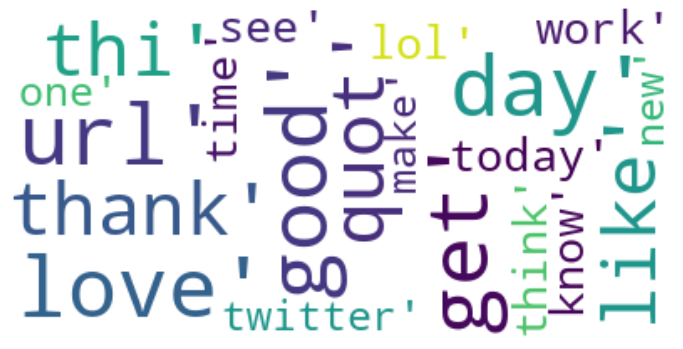

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(str(good_Freq.most_common(20)))

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
bad = subset.Tweet_tok[subset.Sentimiento == 0].sum() 
bad_Freq = nltk.FreqDist(bad)

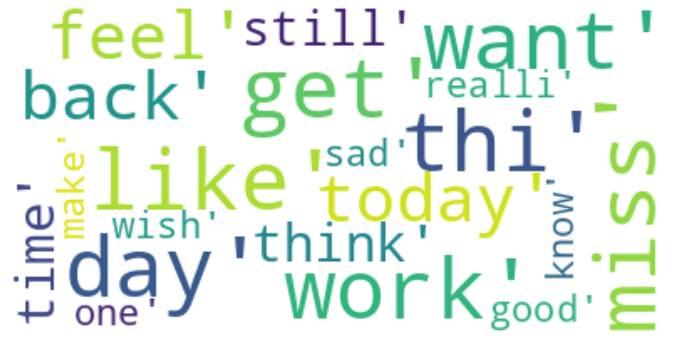

In [33]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(str(bad_Freq.most_common(20)))

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 1.5.5.   Comenzamos con los modelos



In [35]:
import collections
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras import layers

2022-02-16 11:41:22.681781: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-16 11:41:22.681804: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Separamos los datos en datos de entrenmaineto y datos de test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(subset.Tweet, subset.Sentimiento, shuffle=True, test_size=0.1)

In [39]:
# Comprobamos si están balanceados
print(y_train.value_counts())
print(y_test.value_counts())

4    18030
0    17970
Name: Sentimiento, dtype: int64
0    2030
4    1970
Name: Sentimiento, dtype: int64


In [40]:
print(X_train.head())

31065    make me happi my counti treasur isn clever eno...
23993    well htc be the on one that make them then aga...
33196    go to work on ab while watch xena warrior prin...
28659    have fun fun fun last night but now have to do...
9885     hw cm mtv duznt show music anymor all be bunch...
Name: Tweet, dtype: object


#### **TF-IDF VECTORISER**

Usamos TF-IDF Vectoriser para evaluar el nivel de importancia de las palabras que se encuentran dentro de una misma frase, teniendo en cuenta si se repiten mucho/poco.

[REFERENCIA TF-ID](https://monkeylearn.com/blog/what-is-tf-idf/#:~:text=TF%2DIDF%20(term%20frequency%2D,across%20a%20set%20of%20documents.)

In [42]:
vec = TfidfVectorizer(ngram_range=(1,2), max_features=5000000)

vec.fit(X_train)

TfidfVectorizer(max_features=5000000, ngram_range=(1, 2))

In [43]:
# Aquí hay que hacer un pequeño cambio en la estructura de los datos para poder entrenar con ellos.
X_train = vec.transform(X_train)
X_test  = vec.transform(X_test)

 **Evaluamos el modelo:**

Explicación del reporte impreso en tabla: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [44]:
def evaluar_modelo(modelo):
    
    # Evaluar en modelo en el conjunto de test
    y_pred = modelo.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    # Calcular la matriz de confusión para evaluar el resultado
    matriz_confusion = confusion_matrix(y_test, y_pred)

    porcentajes = ['{0:.1%}'.format(value) for value in matriz_confusion.flatten() / np.sum(matriz_confusion)]

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=2) 
    sns.heatmap(matriz_confusion, annot = np.asarray(porcentajes).reshape(2,2), cmap = 'Greens',fmt = '',
                xticklabels = ['Negativa','Positiva'], yticklabels = ['Negativa','Positiva'])

    plt.xlabel("Valores Estimados", labelpad = 10)
    plt.ylabel("Valores Reales"   , labelpad = 10)
    plt.title ("Matriz de confusión", pad = 10)

#### **BERNOULLI NL MODEL**

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

              precision    recall  f1-score   support

           0       0.82      0.65      0.72      2030
           4       0.70      0.85      0.77      1970

    accuracy                           0.75      4000
   macro avg       0.76      0.75      0.75      4000
weighted avg       0.76      0.75      0.75      4000



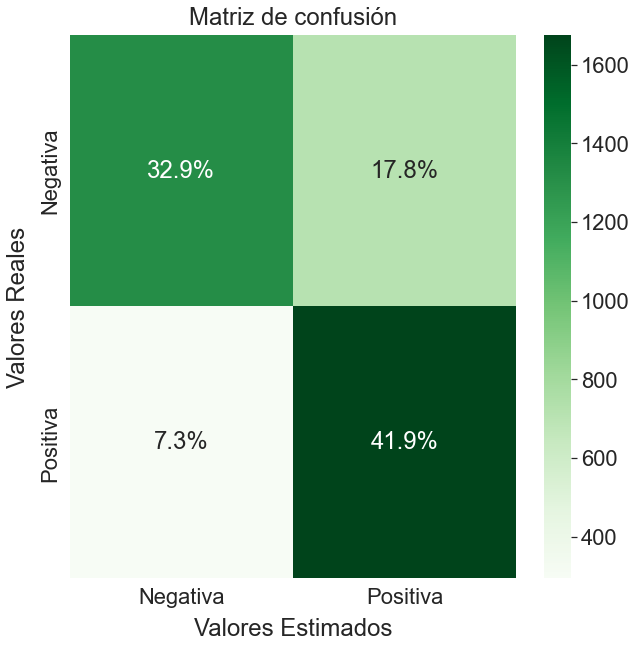

In [46]:
BNB = BernoulliNB(alpha=10)
BNB.fit(X_train, y_train)
evaluar_modelo(BNB)

#### **LINEAR SVC MODEL**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2030
           4       0.77      0.78      0.78      1970

    accuracy                           0.78      4000
   macro avg       0.78      0.78      0.78      4000
weighted avg       0.78      0.78      0.78      4000



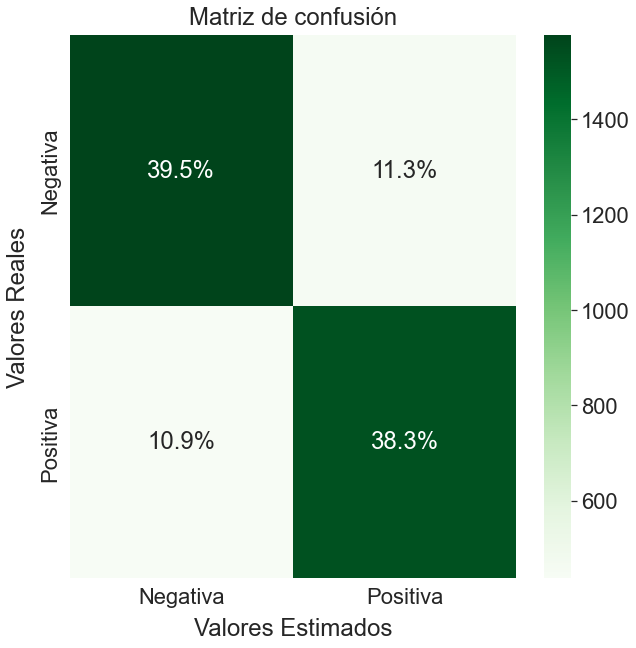

In [48]:
SVC = LinearSVC(random_state=7)
SVC.fit(X_train, y_train)
evaluar_modelo(SVC)

#### **LOGISTIC REGRESSION MODEL**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2030
           4       0.78      0.78      0.78      1970

    accuracy                           0.78      4000
   macro avg       0.78      0.78      0.78      4000
weighted avg       0.78      0.78      0.78      4000



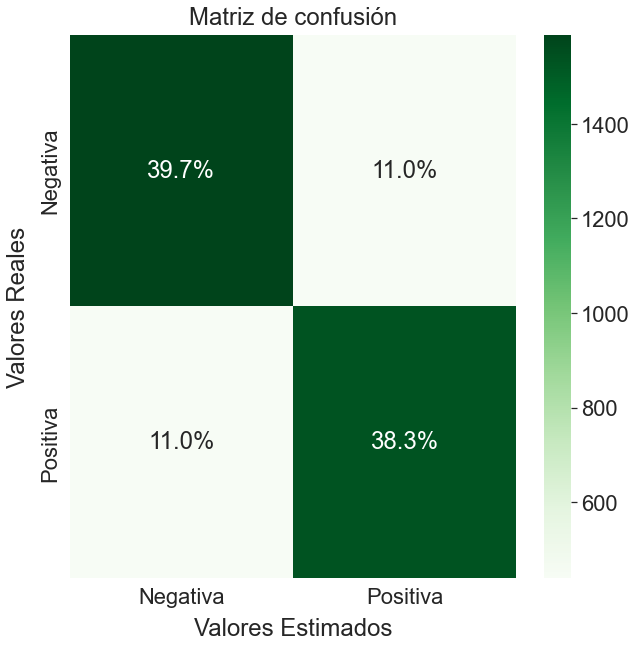

In [49]:
LR = LogisticRegression(C=1, max_iter=2000)
LR.fit(X_train, y_train)
evaluar_modelo(LR)

#### **RANDOM FOREST REGRESSOR**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2030
           4       0.76      0.77      0.77      1970

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



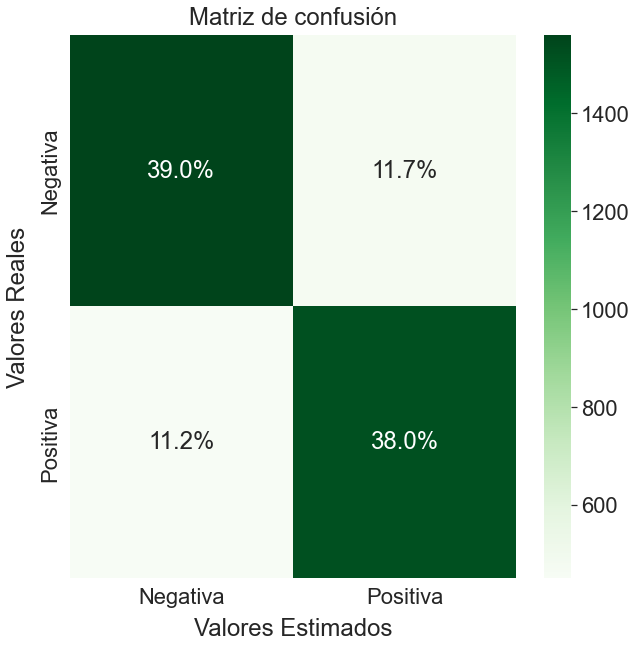

In [51]:
RC = RandomForestClassifier(max_depth=10, random_state=7)
RC.fit(X_train, y_train)
evaluar_modelo(RC)

#### **EXTRAS**

Aquí se pretende mostrar un abanico de opciones, que a pesar de no ser modelos de Machine Learning, son ampliamente utilizamos para la determinación del sentimiento del texto que se procesa. 

In [52]:
compound_scores = []; positive_scores=[]; negative_scores=[];

for i in range(len(subset.Tweet)):
  sentence_compound = sia.polarity_scores(subset.Tweet[i])["compound"]
  compound_scores.append(sentence_compound)
  positive_scores.append(sia.polarity_scores(subset.Tweet[i])["pos"])
  negative_scores.append(sia.polarity_scores(subset.Tweet[i])["neg"])

In [53]:
compound_scores[:10]

[-0.3818, -0.4588, 0.4939, 0.0258, -0.6597, 0.0, 0.4767, 0.5994, 0.0, 0.0]



---



# **2. PROCESADO DE IMAGEN**

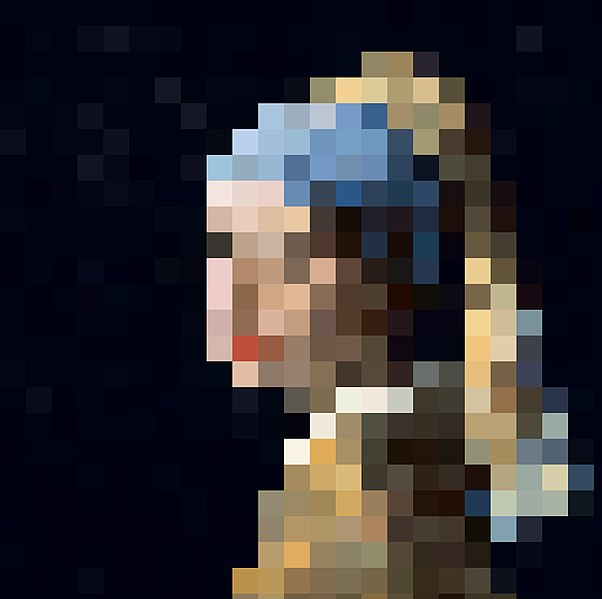

[REFERENCIA IMAGEN](https://upload.wikimedia.org/wikipedia/commons/e/ed/Girl_with_a_Pearl_Earring_%28pixelated%29.jpg)

## *2.1. DEFINICIÓN E IMPORTANCIA*

---

En líneas generales, el procesado de imagen se podría definir como el conjunto de técnicas y herramientas que nos permiten trabajar sobre imágenes digitales con el fin de modificar su aspecto o extraer información de las mismas. 

Partiendo de la base de que un ordenador interpreta una imagen digital como una serie de pixels (pequeños cuadrados con un color determinado) con un valor equivalente (equivaliendo el 0 al negro y el 255 al blanco), ordenados de manera matricial.

Esa matriz se conoce como "canal", teniendo las imágenes en blanco y negro únicamente un canal y las imágenes RGB tres canales. 

Dichos valores de píxel corresponden con la intensidad de color que reflejan. 

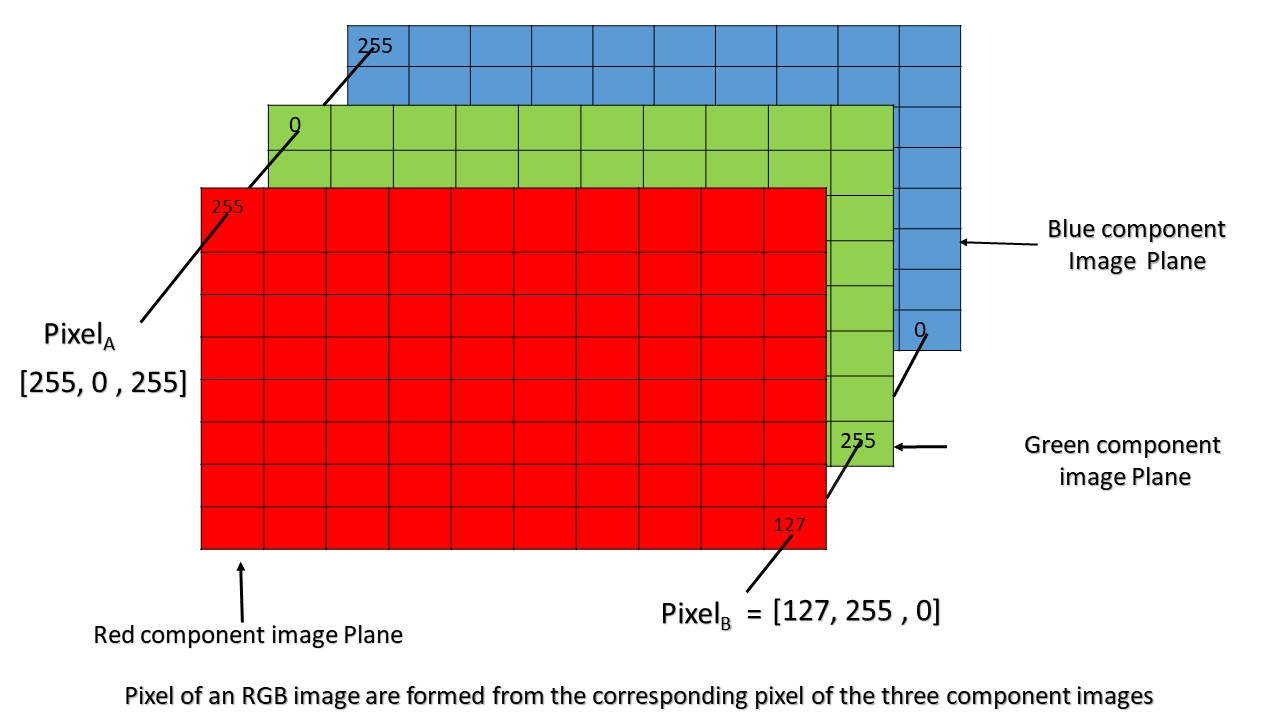

[REFERENCIA IMAGEN](https://www.geeksforgeeks.org/matlab-rgb-image-representation/)

En el tipo de imagenes habituales, todos los píxeles contienen un número de 8-bits, lo que da un total de 256 posibles posiciones. Es por ello que en los límites de los mismos se encuentran el negro y el blanco.

[Referencia extra](https://towardsdatascience.com/understanding-the-basics-of-digital-image-processing-and-computer-vision-using-opencv-8bc0e67243c8)

## *2.2. TAREAS BÁSICAS*

---

Las tareas de preprocesado que se necesitan hacer sobre una imagen para poder trabajar con la misma a la hora de construir una herramienta de identificación de patrones en la misma, dependen en gran medida de la complejidad de la imagen y del objetivo del trabajo. 

Por ejemplo, no es lo mismo procesar una imagen de una partícula obtenida con un microscópio en un laboratorio (generalmente será una figura negra sobre fondo claro), que una imagen de una cámara de seguridad de una cámara situada en un comercio (hablamos ya de una imagen en color con mucho ruido que complicará la detección de contornos en la misma)

Con el fin de esbozar algunas ideas, a continuación se comentan algunas tareas que se pueden llevar a cabo sobre una imagen:

*   Reducción de escala. 
*   Recorte.
*   Cambiar de imagen en color a blanco y negro. 
*   Aplicar filtros de color. 
*   Aplicar transformaciones geométricas, giros.
*   Detección de contornos.
*   Resalte de ciertos objetos. 
*   Resalte de ciertos colores. 
*   ...



## *2.3. ¿DÓNDE PODEMOS VER APLICADAS ESTE TIPO DE TECNOLOGÍAS*

---



*   Conduccion autónoma.
*   Identificación de personas en cámaras de seguridad. 
*   Etiquetado de imágenes según contenido.
*   Mejorar la calidad de imágenes de Rayos X.
*   Identificación de áreas en imágenes de satélites.



## *2.4. LIBRERÍAS*

---

[OpenCV](https://opencv.org/)

Una de las principales librerías de procesado de image, también aplicada a vídeo, que implementa funcionalidades para permitir la detección de caras, objetos, etc.

[SciPy](https://scipy.org/)

Algo más básica que la anterior, pero también ampliamente utilizada para manipulación, modificación y arreglo de imágenes. 


[scikit-image](https://scikit-image.org/)

Otra librería que contienen una gran colección de algoritmos para procesado de imagen. 

[Python Image Library (Pillow/PIL)](https://pillow.readthedocs.io/en/stable/)

Quizás menos usada que las anteriores, pero también implementa herramientas para el procesado de imagen que otras librerías no tienen tan desarrolladas. Algunos ejemplos de ello son labores de filtrado, manipulación y guardado de las mismas. 

## *2.5. APLICACIÓN: TRANSFORMACIÓN DE UNA IMAGEN - Utilizando OpenCV*

---

El objetivo de este ejercicio es realizar un par de transformaciones sobre una imagen, tanto de tamaño, color, filtros, etc. Estos pasos son los que generalmente se necesitan hacer en cualquier problema a gran escala. 

In [1]:
# En este caso trabajaremos con la librería OpenCV, simplemente por ser una de las más utilizadas en este ámbito. 
import cv2
# from google.colab.patches import cv2_imshow

img = cv2.imread('/media/eloi/ELOI/UNED/Cursos de Extension/Python Avanzado/Clases/Dia_2/Data_dia_2/Prueba.jpg')

window_name = 'Ejercicio en clase'

# img = cv2.resize(img, (700, 1000)) Puede usarse esta linia para hacer un resize dando directamente el tamaño final
cv2.imshow(window_name, img)
cv2.waitKey(0)

cv2.destroyAllWindows()

### 2.5.1. Cambio de tamaño.

In [2]:
img_scaled = cv2.resize(img, (0,0), fx=0.1, fy=0.1)  # Asi reescalamos igual en x e y


In [3]:
print(img_scaled.shape)  # Intentsidad de los pixeles de la imagen de RGB (Cubo de datos)

(1004, 717, 3)


### 2.5.2. Recorte.

In [4]:
img_crop = img_scaled[300:690, 170:550]  # Si no especificamos el 3r indice, te quedas con los tres canales (RGB)

cv2.imshow(window_name, img_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

Podemos cambiar el canal de color de la imagen y pasarla a blanco y negro

In [5]:
# Quizás va bien tener esto asi para encontrar el contorno de la fresa
img_BW = cv2.cvtColor(img_crop, cv2.COLOR_RGB2GRAY)

cv2.imshow(window_name, img_BW)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2.5.3. Filtros de color.

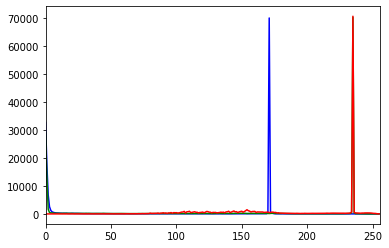

In [6]:
# Podemos ver el histograma de colores de la imagen que representamos para comprobar
# la cantidad de verdes, azules y rojos que contiene
import matplotlib.pyplot as plt
colores = ('b','g','r')
plt.figure() # figsize=(10, 10)

for i,col in enumerate(colores):
    hist = cv2.calcHist([img_crop],[i],None,[256],[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])
    
plt.show()

In [7]:
# En este paso intentaremos resaltar el color rojo de la imagen anterior, correspondiente a la fresa. 
import numpy as np

img_copy = img_crop.copy() # Trabajamos sobre una copia de la imagen para no alterar la original.
resultado = img_crop.copy() # Creamos una imagen sobre la que aplicaremos el filtro.

resultado = cv2.cvtColor(resultado, cv2.COLOR_BGR2HSV)

# Estos son los límites comunes para el color rojo, el inferior y el superior
lower_red = np.array([0,0,13])
upper_red = np.array([10,255,255])

# mask = 
# resultado = 

# cv2.imshow(mask)
cv2.imshow(window_name, resultado)
cv2.waitKey(0)

cv2.destroyAllWindows()

### 2.5.4. Caracterización de una imagen

Esta parte son labores fundamentales en procesos de visión artificial para caracterizar una imagen de manera que se extraigan un número de inputs que después se puedan emplear como parámetros de entrada de una modelo de machine learning. 

En el caso de deep learning, a la red se la "alimenta" con la propia imagen sin pre-procesar. Por el contrario, para utilizar algoritmos comúnes de ML para el procesado de imagen, es vital realizar este paso previo de caracterización. 

Muchas veces, para mejorar la detección de contornos se suelen usar herramientas de dilatación y erosión para falicitar la acción. En el caso de la dilatación, aumenta el área del objeto, intentando accentuar los detalles del mismo. En el caso de la erosión, disminuye los detalles del objeto, difuminando el contacto del mismo con el fondo.

In [8]:
img_copy = img_crop.copy()

kernel = np.ones((2,2), np.uint8) # El kernel se utiliza para cambiar el tamaño de los pixeles en la imagen original. 

img_erosion = cv2.erode(img_copy, kernel, iterations=2)
img_dilation = cv2.dilate(img_copy, kernel, iterations=2)

cv2.imshow(window_name, img_copy)
cv2.imshow(window_name + " erode", img_erosion)
cv2.imshow(window_name + " dilation", img_dilation)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [9]:
img_copy = img_crop.copy()

kernel = np.ones((4,4), np.uint8) # El kernel se utiliza para cambiar el tamaño de los pixeles en la imagen original. 

img_erosion = cv2.erode(img_copy, kernel, iterations=2)
img_dilation = cv2.dilate(img_copy, kernel, iterations=2)

cv2.imshow(window_name, img_copy)
cv2.imshow(window_name + " erode", img_erosion)
cv2.imshow(window_name + " dilation", img_dilation)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [10]:
# Cuando se procede a detectar contornos, normalmente se suelen difuminar la imagene en general para que sea
# más sencillo captar los mismos

img_copy = img_erosion.copy()
blur = cv2.medianBlur(img_copy, 7)
gris = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gris, 150 ,255, cv2.THRESH_BINARY_INV)[1]

cv2.imshow(window_name, img_copy)
cv2.imshow(window_name + " blur", blur)
cv2.imshow(window_name + " gris", gris)
cv2.imshow(window_name + " thresh", thresh)

cv2.waitKey(0)

cv2.destroyAllWindows()


Además, siguiendo la línea de la caracterización de la imagen, se pueden conseguir otros parámetros de interés que servirían como parámetros de entrada del modelo en cuestión. 

In [12]:
# MOMENTOS: 
# "Un momento de imagen es cierto promedio ponderado particular de las intensidades de los píxeles de una imagen; o también una función de tales momentos" [REF:https://es.wikipedia.org/wiki/Momentos_de_imagen]
cnt = cnts[0]
M = cv2.moments(cnt)
print(M)


{'m00': 80915.0, 'm10': 15951492.333333332, 'm01': 15665416.833333332, 'm20': 3615472513.833333, 'm11': 3089190052.1666665, 'm02': 3655355207.333333, 'm30': 897381247483.7001, 'm21': 693197251225.6833, 'm12': 721794458553.4833, 'm03': 955097811298.55, 'mu20': 470813208.878849, 'mu11': 927350.3760519028, 'mu02': 622477686.9467134, 'mu30': -1000123949.4810791, 'mu21': -7136051913.246216, 'mu12': 822757067.1019897, 'mu03': 6381159655.3302, 'nu20': 0.07191021078037217, 'nu11': 0.0001416399534922767, 'nu02': 0.09507486372570124, 'nu30': -0.0005370085879468372, 'nu21': -0.0038316462308856792, 'nu12': 0.00044177285331179785, 'nu03': 0.0034263128462728868}


In [13]:
# CENTROIDES:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("Los centroides de la presente imagen son: Cx = " + str(cx) + ', Cy = ' + str(cy))

Los centroides de la presente imagen son: Cx = 197, Cy = 193


In [14]:
# AREA
area = cv2.contourArea(cnt)

print("El área dentro del contorno es: " + str(area) + " pixeles")

El área dentro del contorno es: 80915.0 pixeles


In [15]:
## PERIMETRO
perimetro = cv2.arcLength(cnt, True)  # El True indica que es un contorno cerrado

print("El perímetro albergado por el contorno es: " + str(perimetro) + " pixeles")

El perímetro albergado por el contorno es: 1502.670258641243 pixeles


In [16]:
# Se pueden dibujar figuras geométricas que encuadren al objeto de interés...
img_4 = img_crop.copy()

x, y, w, h = cv2.boundingRect(cnt)

cv2.rectangle(img_4, (x, y), (x+w, y+h), (0,0,0), 2)

cv2.imshow(window_name, img_4)

cv2.waitKey(0)

cv2.destroyAllWindows()

# **The world is your oyster!** 

---

La idea fundamental es que el abanico de posibilidades que se pueden llevar a cabo con una imagen es muy amplio y como ya hemos hablado, depende de nuestros objetivos. 

Si aún tienes curiosidad por otros parámetros de medida que se pueden extrar de una imagen, por aquí tienes otra referencia interesante que recopila la mayoría de los que ofrece OpenCV: https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html#gsc.tab=0

Es importante mencionar que además de las opciones que ya vienen implementadas en la propia librería, cualquier opción adicional que se considere de interés se podría añadir a la lista de parámetros de interés. 

---





# [**3. CLUSTERING**](https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html)

*Clustering* es una de las ténicas de machine learning no supervisado más conocidaas. Su objetivo es juntar los datos en grupos sin tener ninguna información sobre la división real de los datos.

<center><img src='https://drive.google.com/uc?id=1sLtB8S7KwjI-267z6UcAzVv2SuFjAJqr'></center> 


La primera parte del problema de clustering es averiguar cuál es el número de grupos (K) óptimo para dividir los datos a través del cálculo de la distribución p(K|S).  En el caso del aprendizaje supervisado ya se sabría cuantas clases diferentes existen en los datos, pero en el aprendizaje supervisado es algo, directa o indirectamente, a nuestra elección.

La segunda parte del problema de clustering es estimar a que grupo o clúster pertenece cada uno de los puntos. Se generará una variable C de tal forma que $c_i\ \in{1,\ldots,K}$ represente el grupo al que es asignado el punto i . Se podrá extraer el grupo al que pertenece cada uno de los puntos calculando $c_i^\ast=\ \max_{k}{p\left(c_i=k\right|x_i,\ S)}$. 

<center><img src='https://drive.google.com/uc?id=1LUQjIeXgwfiHA-XyWFiSWyqHLRUQWzYw'></center> 

### **Ejemplo práctico**: [K-means](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
# %matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv(r"/media/eloi/ELOI/UNED/Cursos de Extension/Python Avanzado/Clases/Dia_2/Data_dia_2/analisis.csv")
print(dataframe.head())
print(dataframe.describe())

           usuario         op         co         ex         ag         ne  \
0     3gerardpique  34.297953  28.148819  41.948819  29.370315   9.841575   
1  aguerosergiokun  44.986842  20.525865  37.938947  24.279098  10.362406   
2   albertochicote  41.733854  13.745417  38.999896  34.645521   8.836979   
3    AlejandroSanz  40.377154  15.377462  52.337538  31.082154   5.032231   
4   alfredocasero1  36.664677  19.642258  48.530806  31.138871   7.305968   

   wordcount  categoria  
0    37.0945          7  
1    78.7970          7  
2    49.2604          4  
3    80.4538          2  
4    47.0645          4  
               op          co          ex          ag          ne   wordcount  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean    44.414591   22.977135   40.764428   22.918528    8.000098   98.715484   
std      8.425723    5.816851    7.185246    7.657122    3.039248   44.714071   
min     30.020465    7.852756   18.693542    9.305985    

In [3]:
dataframe = dataframe.sort_values(by='categoria')
print(dataframe)

             usuario         op         co         ex         ag         ne  \
139   _josecoronado_  36.258913  18.769348  45.225652  39.427283   9.252065   
39      Diane_Keaton  46.955854  23.499024  35.376179  23.747561   4.934065   
44          EmWatson  52.535221  37.277168  35.290973  15.793009   5.702301   
36        DANIROVIRA  41.765960  23.895051  49.865253  30.071414   2.546667   
101  MelanieGriffith  51.006406  22.106563  36.351563  22.484609   6.091250   
..               ...        ...        ...        ...        ...        ...   
111     perezreverte  37.411719  19.024922  43.379531  33.332422  10.238984   
110      paulocoelho  45.669015  27.750303  44.523106  20.548864   9.120833   
113       porliniers  41.483701  16.283071  50.352283  30.561496   6.048268   
65          iescolar  39.361550  22.221628  40.205116  26.271240  12.314729   
79   josjaviersantos  31.750300  20.558700  44.344300  39.149900   5.220800   

     wordcount  categoria  
139   113.7391         

In [4]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

/tmp/ipykernel_7061/3218972374.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


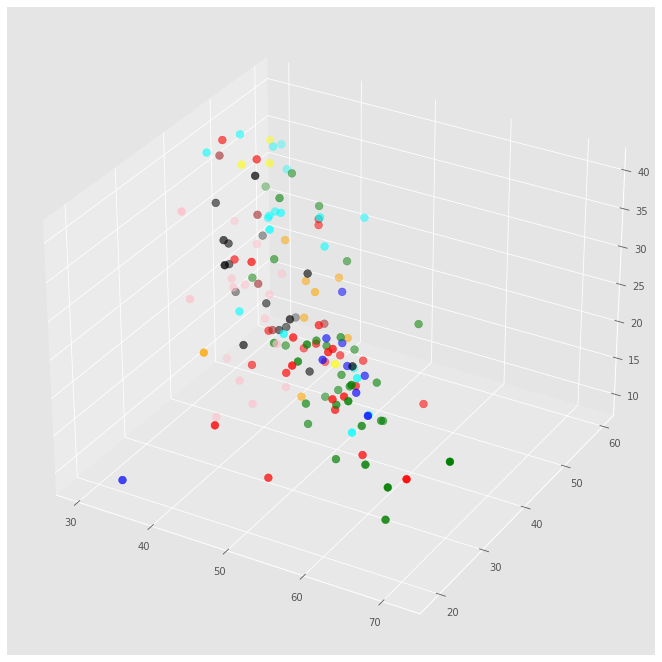

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14), KMeans(n_clusters=15), KMeans(n_clusters=16), KMeans(n_clusters=17), KMeans(n_clusters=18), KMeans(n_clusters=19)]
[-25194.03935276632, -12632.03153694523, -10047.167149698787, -8343.956647749563, -6962.912846887289, -6093.603823420994, -5544.083971242855, -4853.062646756334, -4390.935501596936, -3996.0730828371693, -3684.2949280235016, -3434.1854337832833, -3188.1214385321364, -3068.8786285146807, -2810.322879426747, -2700.2592217681354, -2561.3172456804605, -2387.9913514388663, -2279.6124091209426]


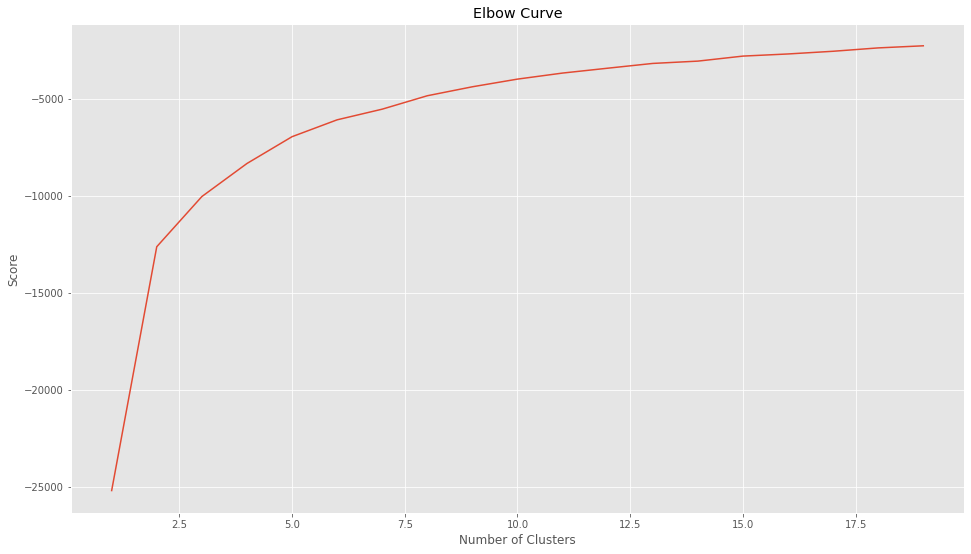

In [6]:
Nc = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=9).fit(X)  # COjo 9 pq se que tiene qeu ser 9, pero en realidad tengo que verlo desde el grafico
centroids = kmeans.cluster_centers_
print(centroids)

[[42.90489747 47.69437547 27.81493053]
 [60.75174145 30.04568836 15.20754891]
 [39.64074839 42.44488906 20.00082806]
 [51.46702333 42.79574143 15.96356281]
 [35.11102281 46.22785075 35.85848056]
 [37.00571371 38.44969686 29.23573771]
 [41.25709443 27.84871157 15.040178  ]
 [49.04134655 36.84204306 20.00143132]
 [31.84591214 54.77106443 31.49650829]]


/tmp/ipykernel_7061/768180785.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


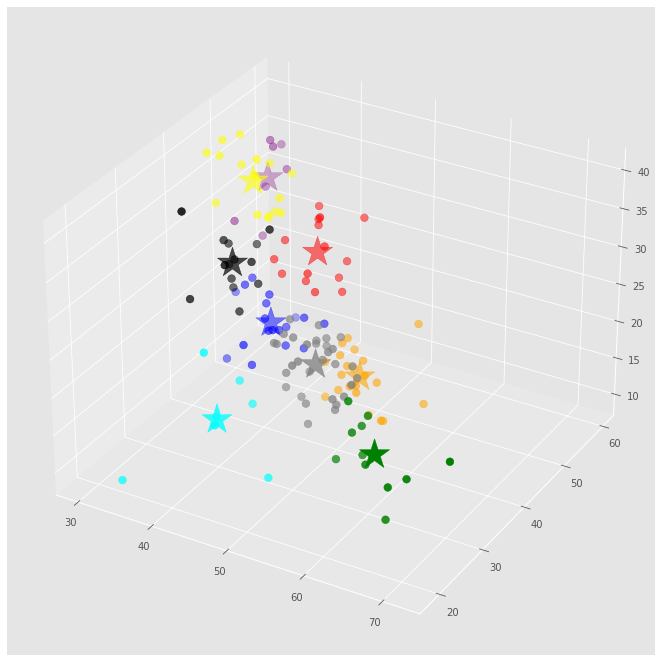

In [8]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

colores = ["red", "green", "blue", "orange", "yellow", "black", "cyan", "gray", "purple"]
asignar = []
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*',c=colores, s=1000)

In [ ]:
import statistics
wrong = 0

ele = npy = 0
for i in ele:
    nn = np.sum(y==i)
    print(nn)
    c = labels[z:(nn+z)]
    print(c)
    try:
        lab = statistics.mode(c)
    except:
        lab=c[0]
    nn_prod = np.sum(c==lab)
    # MIRAR ARCHIVO PASADO POR QUE NO HA DADO TIEMPO...

In [9]:
from sklearn.metrics import accuracy_score

# MIRAR ARCHIVO PASADO POR QUE NO HA DADO TIEMPO...